# CENG499 Black Friday Project
 ## Projcet Team
    Project Team:
    İrfan Doğan BACAKSIZ
    Ebru GÜNDÜZ
    Ali Cem KOÇ
    Nilay Gizem TEZER
### Our Data
    https://www.kaggle.com/mehdidag/black-friday

# 1.Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
# linear algebra
import numpy as np
import statistics

# data processing
import pandas as pd
import ast
import csv

# data visualization
import seaborn as sns; sns.set_style('darkgrid')
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import statsmodels.formula.api as sm
import scipy as sc
import scipy.stats as sp

D:\Users\ACK\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# 2. Reading File

In [2]:
df = pd.read_csv("BlackFriday.csv")
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


# 3. Pre-processing

In [3]:
df.drop('Product_Category_3', axis=1, inplace=True)
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Purchase                           0
dtype: int64

In [4]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df.Product_Category_2.mode()[0])

df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,8.0,7871


# 4. Gender

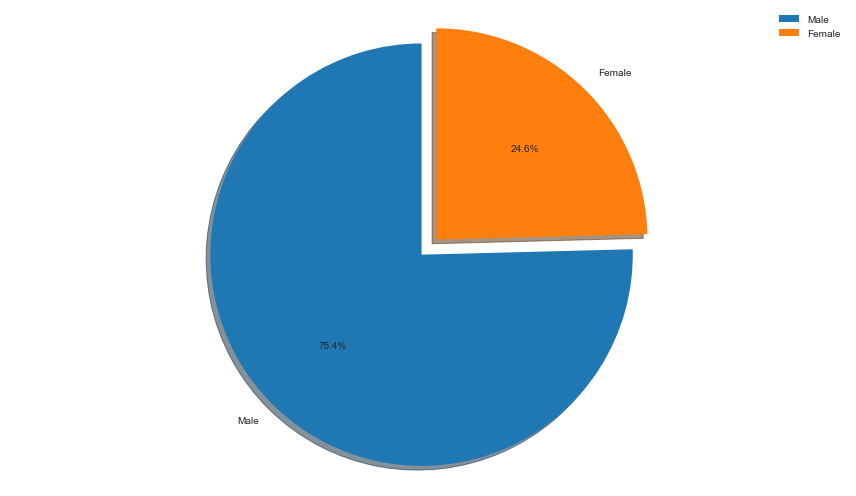

In [5]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Gender'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',
    	shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [6]:
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)

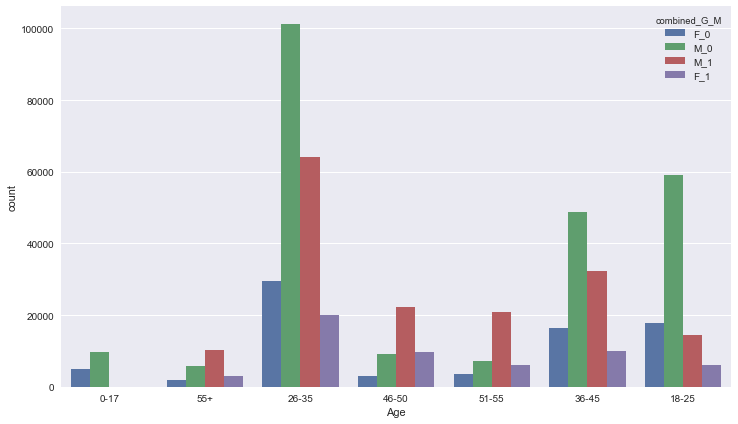

In [7]:
sns.set(rc={'figure.figsize':(12,7)})
sns.countplot(df['Age'],hue=df['combined_G_M'])

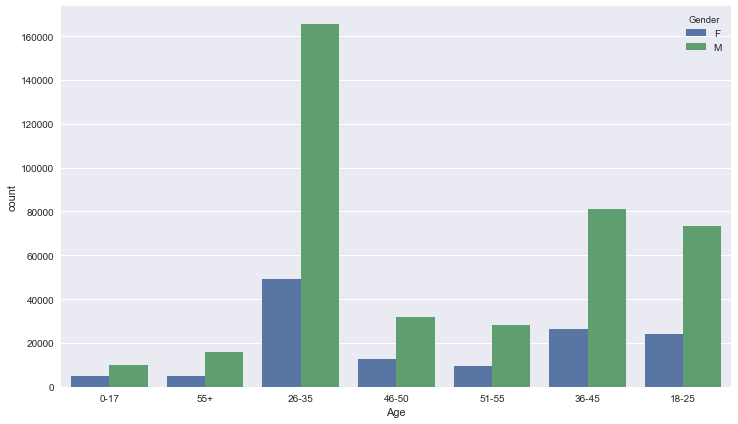

In [8]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(df['Age'],hue=df['Gender'])


# 5. City

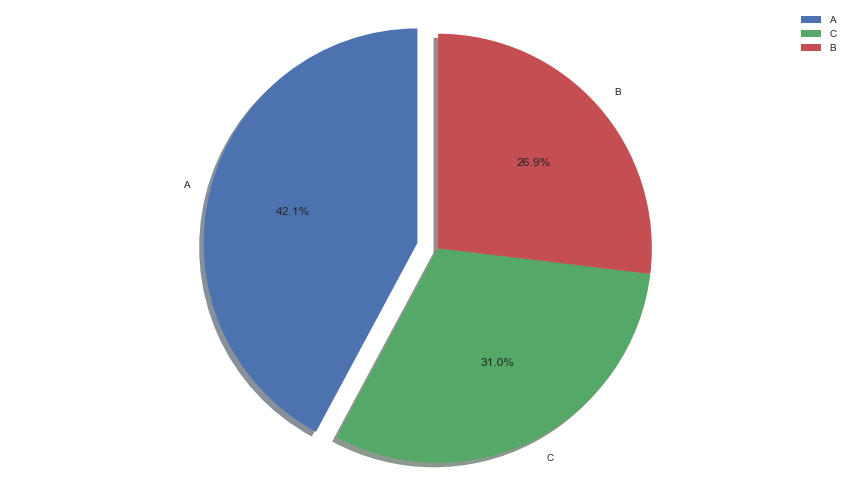

In [9]:
#Graph of number of people who shopping in cities
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['City_Category'].value_counts(),explode=explode, labels=df['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()



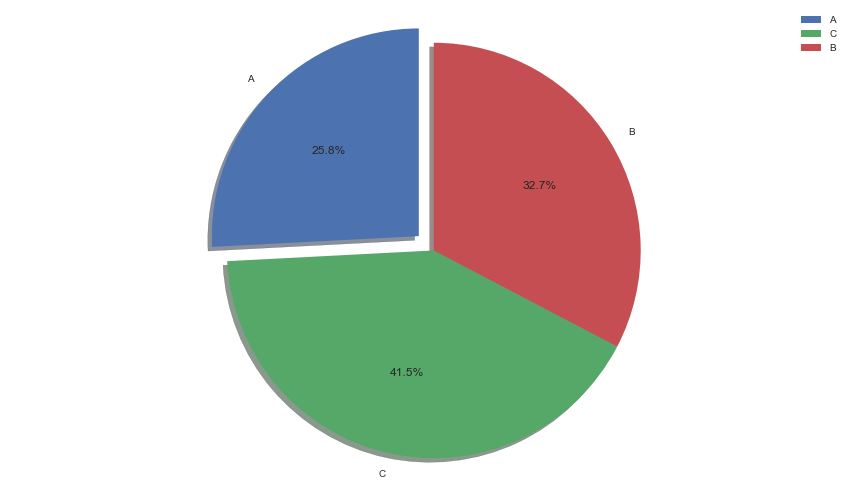

In [10]:
#Graph of spending money in cities

explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df.groupby('City_Category')['Purchase'].sum(),explode=explode, labels=df['City_Category'].unique(), autopct='%1.1f%%',
    	shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()


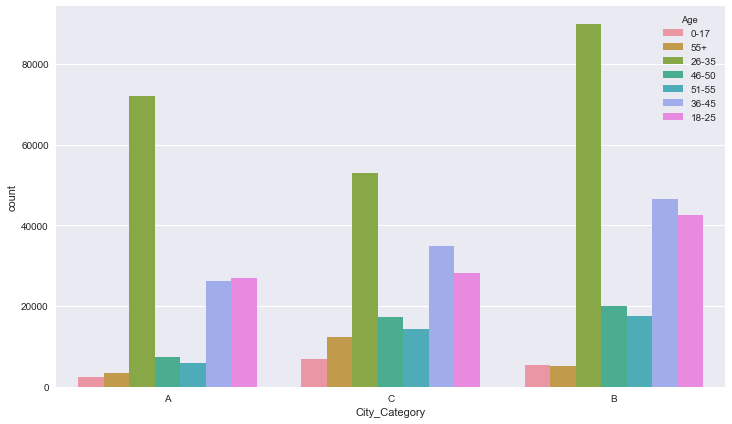

In [11]:
# Age - City Graph
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(df['City_Category'],hue=df['Age'])

# 6. Stability

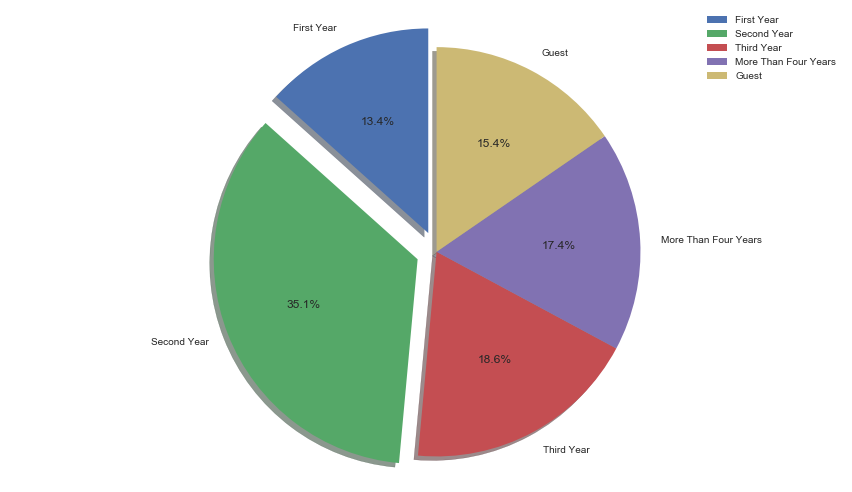

In [12]:
labels=['First Year','Second Year','Third Year','More Than Four Years','Guest']
explode = (0.1, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df.groupby('Stay_In_Current_City_Years')['Purchase'].sum(),explode=explode, labels=labels, autopct='%1.1f%%',
    	shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()


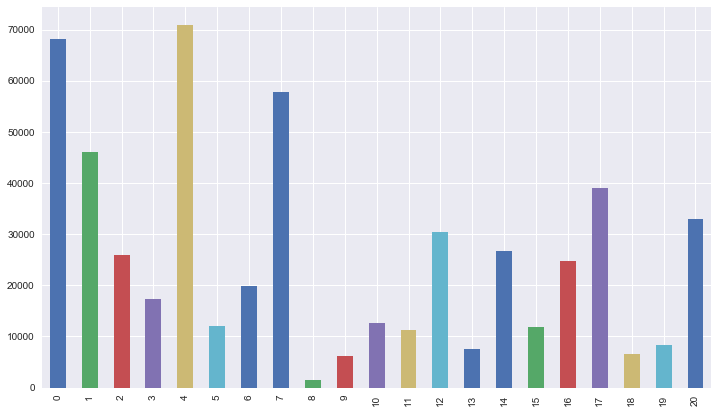

In [13]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df['Occupation'].value_counts().sort_index().plot('bar')

# 7.Products & Categories

In [14]:
def plot(group,column,plot):
    ax=plt.figure(figsize=(12,6))
    df.groupby(group)[column].sum().sort_index().plot(plot)

In [15]:
def plots(group,column,plot):
    ax=plt.figure(figsize=(12,6))
    df.groupby(group)[column].sum().sort_values().plot(plot)

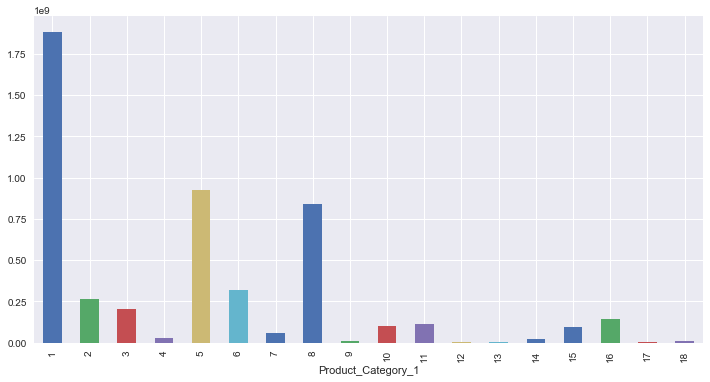

In [16]:
plot('Product_Category_1','Purchase','bar')

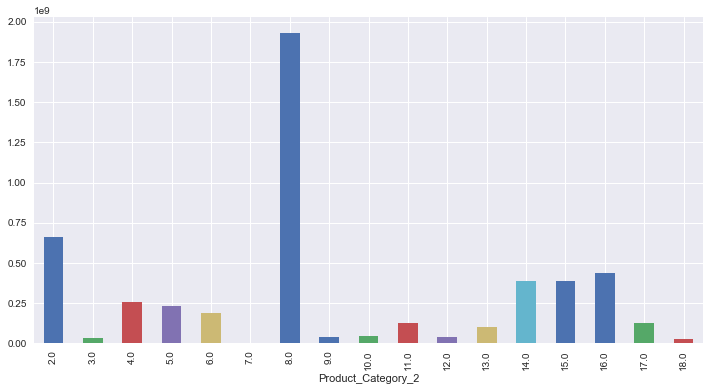

In [17]:
plot('Product_Category_2','Purchase','bar')

# 8. Products & Genders

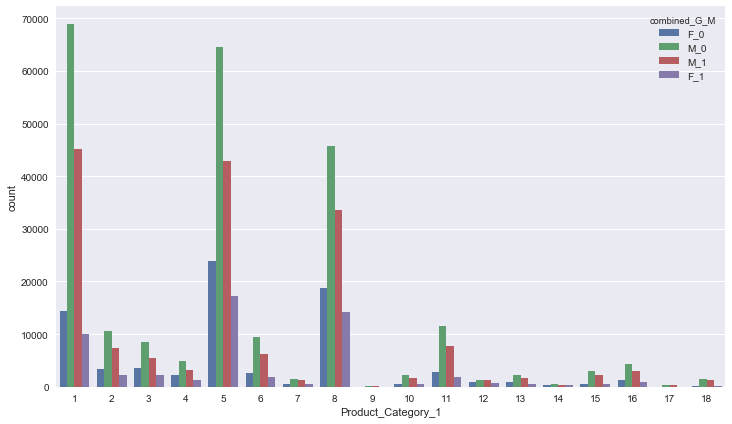

In [18]:
sns.countplot(df['Product_Category_1'],hue=df['combined_G_M'])

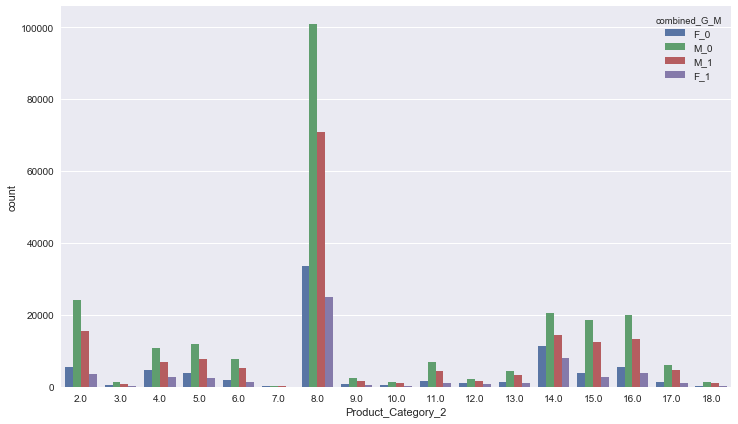

In [19]:
sns.countplot(df['Product_Category_2'],hue=df['combined_G_M'])

# 9. Products & purchases

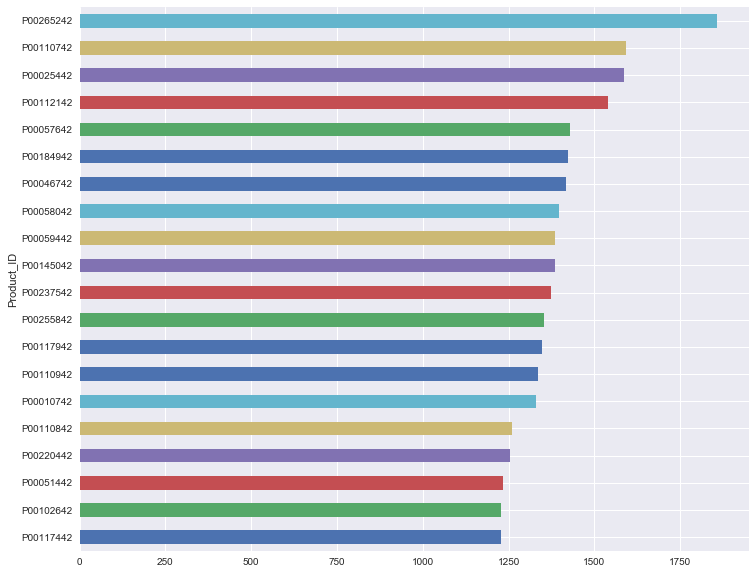

In [20]:
fig1, ax1 = plt.subplots(figsize=(12,10))
df.groupby('Product_ID')['Purchase'].count().nlargest(20).sort_values().plot('barh')

Text(0.5,1,'Average purchase by Age')

<Figure size 1440x360 with 0 Axes>

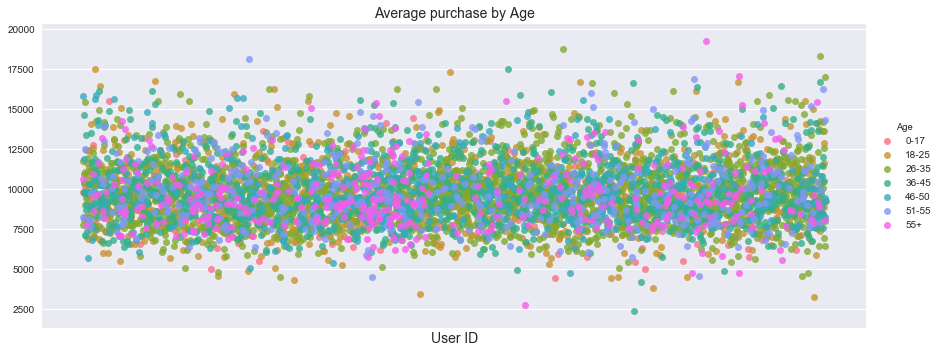

In [21]:
df_Apurchase_by_UID_Gender = df.groupby(['User_ID','Gender']).agg({'Purchase':np.mean}).reset_index()
df_Apurchase_by_UID_Age = df.groupby(['User_ID','Age']).agg({'Purchase':np.mean}).reset_index()
age_order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']

plt.figure(figsize=(20,5))
sns.lmplot('User_ID','Purchase',data=df_Apurchase_by_UID_Age,fit_reg=False,hue='Age',hue_order=age_order,aspect=2.5)
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Age',fontsize=14)

# 10. Correlation

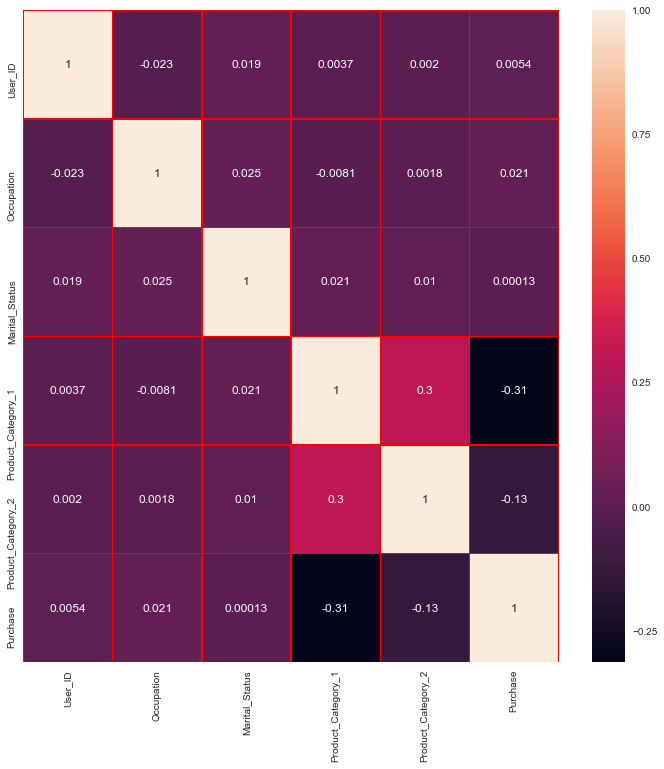

In [22]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red",ax=ax)
plt.show()